# Part One: A/B testing 
     My null Hypothesis is going to be that A == B 

In [1]:
import math
import scipy.stats as st 
p = (500 + 550)/(1000+1000)
pOne = 500/1000
pTwo = 550/1000
z = (pOne-pTwo)/(math.sqrt(p*(1-p)*((1/500) + (1/550))))
myCDF = st.norm.cdf(z)

print(z)
print(f'The p-Value I got was {myCDF}')
print("This value false our signficance levels for both 5% and 1%. \nFrom this we can conculde that A==B is false")


-1.6203739223302887
The p-Value I got was 0.05257598908684536
This value false our signficance levels for both 5% and 1%. 
From this we can conculde that A==B is false


In [2]:
import math
import scipy.stats as st 
temp = 560
p = (500 + temp)/(1000+1000)
pOne = 500/1000
pTwo = temp/1000
z = (pOne-pTwo)/(math.sqrt(p*(1-p)*((1/500) + (1/temp))))
myCDF = st.norm.cdf(z)

print(z)
print(f'The p-Value I got was {myCDF}')
print('With this value it would pass the 5% but fail the 1%') 


-1.953846627764586
The p-Value I got was 0.025359679038051884
With this value it would pass the 5% but fail the 1%


In [3]:
import math
import scipy.stats as st 
temp = 570
p = (500 + temp)/(1000+1000)
pOne = 500/1000
pTwo = temp/1000
z = (pOne-pTwo)/(math.sqrt(p*(1-p)*((1/500) + (1/temp))))
myCDF = st.norm.cdf(z)

print(z)
print(f'The p-Value I got was {myCDF}')

print('With this value it would pass the 5% and the 1%')

-2.29047319526092
The p-Value I got was 0.010996950349319912
With this value it would pass the 5% and the 1%


Over all based on the original constraints that was placed on the problem as a company we can say that logo A and B are not the same in people's eyes. As a pure numbers person we also can not say that B is more A just that they are not equal. But as a not pure numbers person because the data showed there is a big enough difference in A and B to show they are not equal I would say that B is the better choice. 

# Part 2: Regression of real estate data

Task 1 import the data


In [4]:
import pandas as pd
data1 = pd.read_csv("realEstate1.csv", thousands = ',')
data2 = pd.read_csv("realEstate2.csv", thousands = ',')
mydata = [data1,data2]
estateData = pd.concat(mydata)
estateData = estateData[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
estateData = estateData[estateData['LstPrice']>=200000]
estateData = estateData[estateData['LstPrice']<=10000000]
estateData = estateData[estateData['Longitude']<-1]
estateData = estateData[estateData['Taxes']<=20000]
estateData = estateData[estateData['Patio']<=30]
estateData = estateData[estateData['Acres']<=8]
print(estateData)

     Acres  Deck  GaragCap   Latitude   Longitude  LstPrice  Patio  PkgSpacs  \
0     0.29     1         3  40.779524 -111.893542    725000      1         0   
1     0.01     0         0  40.773243 -111.883291    205000      0         0   
2     0.11     0         0  40.773972 -111.867470    390000      1         0   
3     0.14     0         1  40.783009 -111.872100    445000      1         3   
5     0.01     0         2  40.771693 -111.886951    339000      0         2   
..     ...   ...       ...        ...         ...       ...    ...       ...   
143   0.28     1         3  40.782933 -111.851143    995000      0         6   
144   0.01     0         2  40.770904 -111.886201    349999      2         2   
145   0.00     0         0  40.773843 -111.891911    249900      0         0   
146   0.07     0         1  40.772835 -111.854867    330000      0         0   
147   0.01     1         2  40.771980 -111.885262    385000      1         0   

          PropType  SoldPrice  Taxes  T

# Task 2: clean the data

In [5]:
listOfFloats = ['Acres','Latitude', 'Longitude','PkgSpacs','SoldPrice', 'Taxes', 'YearBlt']
listOfInts = ['Deck', 'GaragCap','LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice','TotSqf','Taxes','YearBlt']
for x in listOfFloats:
    estateData[x] = estateData[x].astype(float)
for x in listOfInts:
    estateData[x] = estateData[x].astype(int)
estateData['Prop_Type'] = 0
mask = (estateData['PropType'] == "Single Family")
estateData.loc[(mask == True),'Prop_Type']= 1
print(estateData)


     Acres  Deck  GaragCap   Latitude   Longitude  LstPrice  Patio  PkgSpacs  \
0     0.29     1         3  40.779524 -111.893542    725000      1         0   
1     0.01     0         0  40.773243 -111.883291    205000      0         0   
2     0.11     0         0  40.773972 -111.867470    390000      1         0   
3     0.14     0         1  40.783009 -111.872100    445000      1         3   
5     0.01     0         2  40.771693 -111.886951    339000      0         2   
..     ...   ...       ...        ...         ...       ...    ...       ...   
143   0.28     1         3  40.782933 -111.851143    995000      0         6   
144   0.01     0         2  40.770904 -111.886201    349999      2         2   
145   0.00     0         0  40.773843 -111.891911    249900      0         0   
146   0.07     0         1  40.772835 -111.854867    330000      0         0   
147   0.01     1         2  40.771980 -111.885262    385000      1         0   

          PropType  SoldPrice  Taxes  T

# Task 3: Exploratory data analysis

    I feel that data have a lot of columns but after cleaning up the data I think it will be easier to manage. So far the values look reasonable but making some scatter plots or might make it easier to see any outliners. I changed the range on my Taxes, Longutiude, Acres and Patio when importing because I feel there where some outliers in them. With arces the value was more then 8 which is more then one standerd deviation from the rest of the data the next closet point being 2 and all the rest falling below 1. I feel this will pull the data away from any true values. patio also has the same story with one value that is above 50 and the rest are below 4 out of 140ish points. 
    

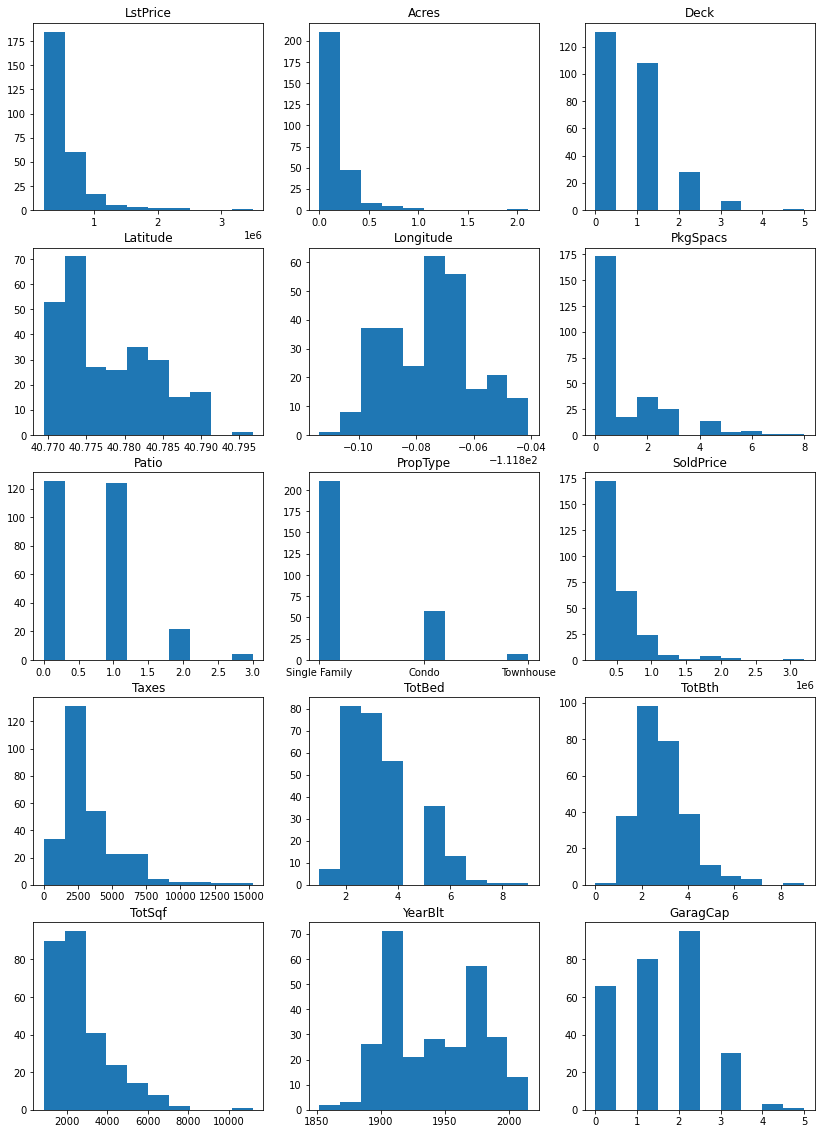

In [6]:
import statsmodels.formula.api as sm
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

def sample_figures():
    fig, subfigs = plt.subplots(5, 3, figsize=(14, 20))

    # pass two arrays in the same order
    subfigs[0,0].title.set_text('LstPrice')
    subfigs[0,0].hist(estateData['LstPrice'])
    subfigs[0,1].title.set_text('Acres')
    subfigs[0,1].hist(estateData['Acres'])
    subfigs[0,2].title.set_text('Deck')
    subfigs[0,2].hist(estateData['Deck'])
    subfigs[1,0].title.set_text('Latitude')
    subfigs[1,0].hist(estateData['Latitude'])
    subfigs[1,1].title.set_text('Longitude')
    subfigs[1,1].hist(estateData['Longitude'])
    subfigs[1,2].title.set_text('PkgSpacs')
    subfigs[1,2].hist(estateData['PkgSpacs'])
    subfigs[2,0].title.set_text('Patio')
    subfigs[2,0].hist(estateData['Patio'])
    subfigs[2,1].title.set_text('PropType')
    subfigs[2,1].hist(estateData['PropType'])
    subfigs[2,2].title.set_text('SoldPrice')
    subfigs[2,2].hist(estateData['SoldPrice'])
    subfigs[3,0].title.set_text('Taxes')
    subfigs[3,0].hist(estateData['Taxes'])
    subfigs[3,1].title.set_text('TotBed')
    subfigs[3,1].hist(estateData['TotBed'])
    subfigs[3,2].title.set_text('TotBth')
    subfigs[3,2].hist(estateData['TotBth'])
    subfigs[4,0].title.set_text('TotSqf')
    subfigs[4,0].hist(estateData['TotSqf'])
    subfigs[4,1].title.set_text('YearBlt')
    subfigs[4,1].hist(estateData['YearBlt'])
    subfigs[4,2].title.set_text('GaragCap')
    subfigs[4,2].hist(estateData['GaragCap'])
    
    

sample_figures()

(array([210.,   0.,   0.,   0.,   0.,  58.,   0.,   0.,   0.,   7.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

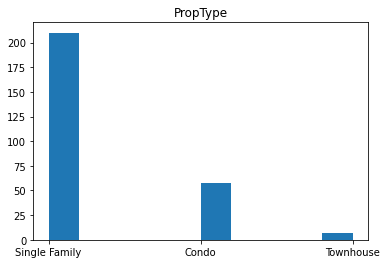

In [7]:
plt.title('PropType')
plt.hist(estateData['PropType'])

In [8]:
corralData = estateData.corr()
print(corralData)

              Acres      Deck  GaragCap  Latitude  Longitude  LstPrice  \
Acres      1.000000  0.201374  0.479135  0.525414   0.245094  0.743334   
Deck       0.201374  1.000000  0.229127  0.326485   0.015577  0.232447   
GaragCap   0.479135  0.229127  1.000000  0.348566   0.185101  0.593416   
Latitude   0.525414  0.326485  0.348566  1.000000  -0.208321  0.310563   
Longitude  0.245094  0.015577  0.185101 -0.208321   1.000000  0.409410   
LstPrice   0.743334  0.232447  0.593416  0.310563   0.409410  1.000000   
Patio      0.170844  0.043753  0.208465  0.146577   0.188180  0.241879   
PkgSpacs   0.028642  0.073606 -0.060270  0.113796   0.016631  0.007250   
SoldPrice  0.756679  0.232456  0.594990  0.321865   0.409475  0.997737   
Taxes      0.767775  0.240444  0.653882  0.338401   0.420592  0.853159   
TotBed     0.527135  0.190949  0.425753  0.295105   0.398061  0.543633   
TotBth     0.612439  0.236329  0.648834  0.315027   0.271476  0.722036   
TotSqf     0.735553  0.267465  0.62769

([<matplotlib.axis.YTick at 0x7fdaf95320d0>,
 [Text(0, 0, 'Acres'),
  Text(0, 1, 'Deck'),
  Text(0, 2, 'GaragCap'),
  Text(0, 3, 'Latitude'),
  Text(0, 4, 'Longitude'),
  Text(0, 5, 'LstPrice'),
  Text(0, 6, 'Patio'),
  Text(0, 7, 'PkgSpacs'),
  Text(0, 8, 'SoldPrice'),
  Text(0, 9, 'Taxes'),
  Text(0, 10, 'TotBed'),
  Text(0, 11, 'TotBth'),
  Text(0, 12, 'TotSqf'),
  Text(0, 13, 'YearBlt'),
  Text(0, 14, 'PropType')])

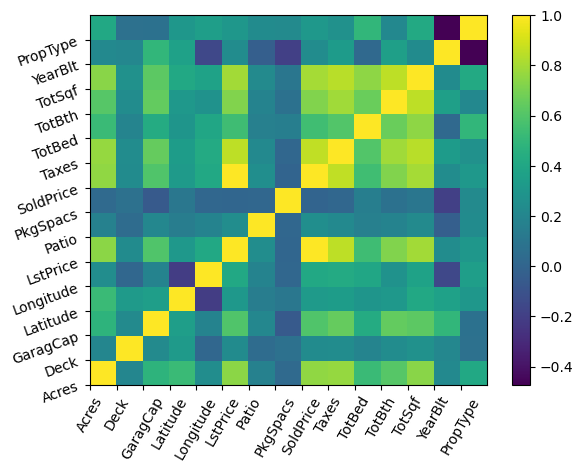

In [9]:
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(corralData)#, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14], ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt','PropType'],rotation=60)
plt.yticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14], ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt','PropType'],rotation=20)



              Acres  LstPrice  SoldPrice     Taxes    TotBed    TotBth  \
Acres      1.000000  0.743334   0.756679  0.767775  0.527135  0.612439   
LstPrice   0.743334  1.000000   0.997737  0.853159  0.543633  0.722036   
SoldPrice  0.756679  0.997737   1.000000  0.859239  0.546357  0.723032   
Taxes      0.767775  0.853159   0.859239  1.000000  0.598329  0.792860   
TotBed     0.527135  0.543633   0.546357  0.598329  1.000000  0.664915   
TotBth     0.612439  0.722036   0.723032  0.792860  0.664915  1.000000   
TotSqf     0.735553  0.797894   0.800217  0.844271  0.749847  0.850588   
YearBlt    0.223565  0.236208   0.238121  0.330896  0.025148  0.353310   

             TotSqf   YearBlt  
Acres      0.735553  0.223565  
LstPrice   0.797894  0.236208  
SoldPrice  0.800217  0.238121  
Taxes      0.844271  0.330896  
TotBed     0.749847  0.025148  
TotBth     0.850588  0.353310  
TotSqf     1.000000  0.232272  
YearBlt    0.232272  1.000000  


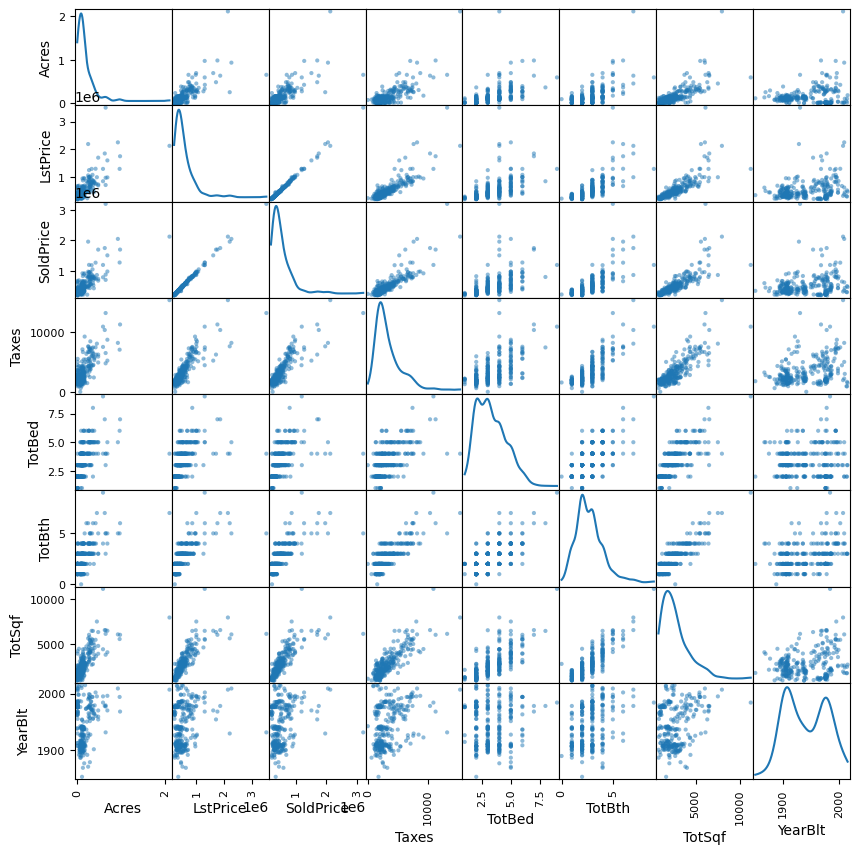

In [10]:
smallerData = estateData[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
print(smallerData.corr())
pd.plotting.scatter_matrix(smallerData, figsize=(10, 10), diagonal='kde')
plt.show()

The strongest I see is the correlation of asking price are sold price, it was .99. To me, this is strong evidence that it was a seller’s market back then. People were getting the amount they were asking for and not really less or more.  Taxes, Sold price, and Acres all seem to have a strong correlation. Something that did surprise me is the lack of correlation to year the house was build and the asking price with a value of only .23. 


# Task 4: Geospatial plot

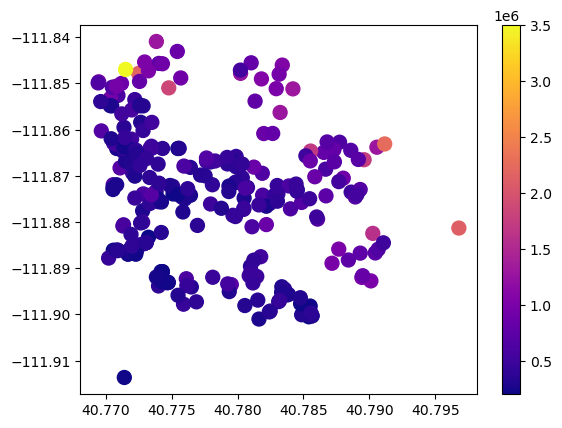

In [11]:
locData = estateData[['Latitude', 'Longitude', 'LstPrice']]
plt.scatter(locData.Latitude, locData.Longitude, s=100, c=locData.LstPrice, cmap='plasma')
plt.colorbar()

There looks to be a little difference in pricing the higher you go on Lat and the lower you go on Long. For looking at the plot the upper right of the chart has overall higher values than the lower left. The location I would say in this area plays a role in the pricing of the house. 

# Task 5: Simple Linear Regression

In [12]:
import statsmodels.formula.api as sm
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

LRData = sm.ols(formula="SoldPrice ~ LstPrice", data=estateData).fit()
LRData.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.012e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          4.15e-322
Time:                        18:46:09   Log-Likelihood:                -3156.2
No. Observations:                 275   AIC:                             6316.
Df Residuals:                     273   BIC:                             6324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.88e+04   2473.446      7.601      0.000    1.39e+04    2.37e+04
LstPrice       0.9324      0.004    245.188      0.000       0.925       0.940
==============================================================================
Omnibus:                       58.731   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.487
Skew:                          -0.412   Prob(JB):                    1.14e-145
Kurtosis:                      10.588   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R^2 for the Sold~Listed is 0.995. Because that is so close to 1 we can say that if we make a line for the Sold and Listed that 99% of the of it can be explained by the model or that there is little variation from the points. As I read this I would say that there is an extremely high chance that the Sold value and Listed value are connected.  Beta_1 is the slope or regression coefficient. It tells us for every unit of y(or Sold) what are x(or Listed) will move. This number is the best the two functions can give us and we use the R^2 to see if it is any good. 

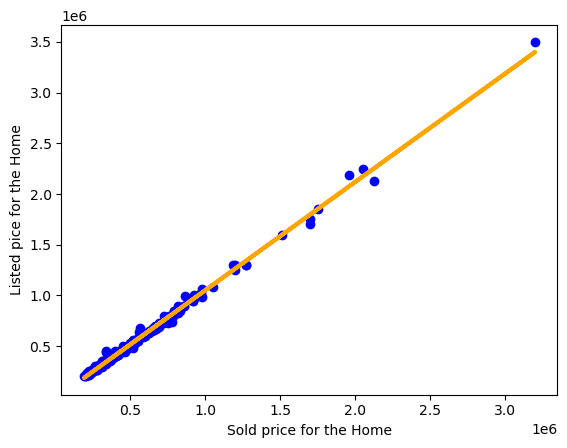

In [13]:
lr = linear_model.LinearRegression()
x = estateData['SoldPrice'].values.reshape(estateData['SoldPrice'].shape[0],1)
y = estateData['LstPrice'].values.reshape(estateData['LstPrice'].shape[0],1)
lr.fit(X=x, y=y)

plt.scatter(x, y,  color='blue')
plt.plot(x, lr.predict(x), color='orange', linewidth=3)

plt.xlabel('Sold price for the Home')
plt.ylabel('Listed pice for the Home')
plt.show()

# Task 6 Multilinear Regression

In [14]:
myLRData = sm.ols(formula="SoldPrice ~ Acres + Deck + GaragCap + Latitude + Longitude + Patio + PkgSpacs + TotBed + TotBth + TotSqf + YearBlt", data=estateData).fit()
myLRData.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     73.25
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.73e-73
Time:                        18:46:10   Log-Likelihood:                -3705.8
No. Observations:                 275   AIC:                             7436.
Df Residuals:                     263   BIC:                             7479.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.353e+08   1.11e+08      4.834      0.000    3.17e+08    7.53e+08
Acres       6.914e+05   8.55e+04      8.085      0.000    5.23e+05     8.6e+05
Deck        1.784e+04   1.43e+04      1.245      0.214   -1.04e+04    4.61e+04
GaragCap    3.853e+04   1.55e+04      2.483      0.014    7971.318    6.91e+04
Latitude   -4.091e+06   2.57e+06     -1.590      0.113   -9.16e+06    9.76e+05
Longitude   3.291e+06   9.25e+05      3.558      0.000    1.47e+06    5.11e+06
Patio       2.447e+04   1.64e+04      1.495      0.136   -7767.852    5.67e+04
PkgSpacs   -8061.3581   7230.257     -1.115      0.266   -2.23e+04    6175.198
TotBed     -3.471e+04   1.29e+04     -2.690      0.008   -6.01e+04   -9306.123
TotBth      4.343e+04   1.77e+04      2.451      0.015    8534.951    7.83e+04
TotSqf        82.9741     18.293      4.536      0.000      46.954     118.994
YearBlt     -105.9367    389.939     -0.272      0.786    -873.737     661.863
==============================================================================
Omnibus:                      299.101   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20401.749
Skew:                           4.331   Prob(JB):                         0.00
Kurtosis:                      44.298   Cond. No.                     3.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.Looking at the data Longitude, TotSqf, and Acres are the strongest with TotBed be really close behind at 0.008

2.Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? 
Provide an interpretation for the coefficient for TotSqf.
    The Coef is 82.9741 so for every TotSqf a place has the price of the place can be expected to raise 82.97

3.Estimate the value that each Garage space adds to a house
    With he Coef being 3.853e4 i would say that each ones adds about ~$38,530 to the value of a place 

4.Does latitude or longitude have an impact on house price? Explain.
    The coef of Latitude is -4.091e06 but because our Lat numbers are just a locaction and we can lower 
    the Latitude number for every Lat we talk away we add 4.091e06. But for Long for every number we take away 
    we only add 3.291e06. 

5.If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting 
the sold price than the list price does. How does your model compare?
    The biggest things that add to the houses price are stuff we will  not be able to change but we 
    can see things that might not be obvious. For example adding a room will give us more value then adding
    a bathroom. A garage will give us more value then a room and a deck. Patio give more value then a deck can
    and it does not matter how old a house is that we are flipping because that has little impact on the final 
    sale price. 


# Task 7: Incorporating a categorical variable

In [15]:
propLRData = sm.ols(formula="SoldPrice ~ Prop_Type", data=estateData).fit()

propLRData.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     29.74
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.10e-07
Time:                        18:46:10   Log-Likelihood:                -3884.4
No. Observations:                 275   AIC:                             7773.
Df Residuals:                     273   BIC:                             7780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.21e+05    4.1e+04      7.820      0.000     2.4e+05    4.02e+05
Prop_Type   2.562e+05    4.7e+04      5.454      0.000    1.64e+05    3.49e+05
==============================================================================
Omnibus:                      235.228   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4334.096
Skew:                           3.421   Prob(JB):                         0.00
Kurtosis:                      21.205   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
sqrLRData = sm.ols(formula="SoldPrice ~ Prop_Type + TotSqf", data=estateData).fit()
sqrLRData.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     242.6
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.34e-61
Time:                        18:46:10   Log-Likelihood:                -3757.8
No. Observations:                 275   AIC:                             7522.
Df Residuals:                     272   BIC:                             7532.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.949e+04   2.97e+04      0.994      0.321   -2.89e+04    8.79e+04
Prop_Type  -1.938e+04   3.27e+04     -0.593      0.553   -8.37e+04    4.49e+04
TotSqf       186.3524      9.194     20.270      0.000     168.253     204.452
==============================================================================
Omnibus:                      278.539   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16019.640
Skew:                           3.895   Prob(JB):                         0.00
Kurtosis:                      39.571   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

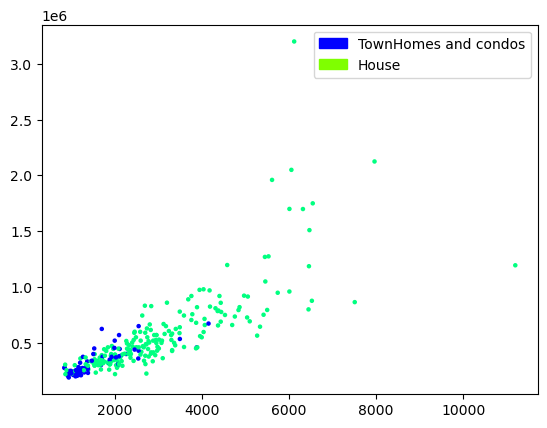

In [17]:
import matplotlib.patches as mpatches
sizeData = estateData[['TotSqf', 'SoldPrice', 'Prop_Type']]
plt.scatter(sizeData.TotSqf, sizeData.SoldPrice, s=5, c=sizeData.Prop_Type, cmap='winter')
blue_patch = mpatches.Patch(color='blue', label='TownHomes and condos')
green_patch = mpatches.Patch(color='chartreuse', label='House')
plt.legend(handles=[blue_patch, green_patch])

With this I feel that the bigger factor is that sqt footing has a huge role in pricing. This on combination that houses on average have a larger sqt footing then Townhouses and condos that they are priced higher. In short the pricing has nothing really to do with if it is a house or a townhouse, it has more to do with sqt footing. So if you found a townhouse with more sqt footing the price would also go up. 